In [1]:
from sklearn import svm, metrics, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, Sequential
# from tensorflow.keras.models import load_model
# from tensorflow.keras.layers import Dense,Activation,Dropout, MaxPooling1D, Conv1D, Flatten, BatchNormalization
# # from tensorflow.keras.layers.normalization import BatchNormalization 
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.utils import to_categorical
from xgboost import XGBClassifier
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import snappy
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import random as rn
np.random.seed(4321)
rn.seed(4321)
# tf.random.set_seed(4321)

In [2]:
# tf.config.list_physical_devices('GPU')

In [3]:
mask_file = r'\water_veg_mask'
mask_path = r'D:\workspace\jupyterNotebooks\Remote Sensing\Water-Segmentation\data'

In [4]:
water_veg_mask = np.load(r'D:\workspace\jupyterNotebooks\Remote Sensing\Water-Segmentation\data\water_mask.npy')

In [5]:
unique, counts = np.unique(water_veg_mask, return_counts=True)
print(unique, counts)
water_veg_mask = water_veg_mask.flatten()

[0 1] [639757  14724]


In [6]:
# flag_0s = water_veg_mask == 0
# flag_1s = water_veg_mask == 1
# flag_2s = water_veg_mask == 2
# mask_0 = water_veg_mask[flag_0s]
# mask_1 = water_veg_mask[flag_1s]
# mask_2 = water_veg_mask[flag_2s]


In [7]:
# non_vegetated_data = np.random.choice(mask_0, size = len(mask_1), replace = False)
# vegetated_data = np.random.choice(mask_2, size = len(mask_1), replace =False)
# print(non_vegetated_data)
# print(vegetated_data)
# print(mask_1)

In [8]:
product_path = r'D:\Engi_Books\CDSAML\reflectance\data\subset_0_of_S1S2_collocated.dim'

In [9]:
product = snappy.ProductIO.readProduct(product_path)
width = product.getSceneRasterWidth()
height = product.getSceneRasterHeight()

In [10]:
# B2 = product.getBand('B2_S')
B3 = product.getBand('B3_S')
B4 = product.getBand('B4_S')
# B5 = product.getBand('B5_S')
# B6 = product.getBand('B6_S')
# B7 = product.getBand('B7_S')
B8 = product.getBand('B8_S')
# B8A = product.getBand('B8A_S')
# B11 = product.getBand('B11_S')
# B12 = product.getBand('B12_S')
# VV = product.getBand('Sigma0_VV_db_M')
# VH = product.getBand('Sigma0_VH_db_M')

In [11]:
# B2_pixels = np.zeros(width * height, np.float32)
# B2.readPixels(0,0,width,height,B2_pixels)
# B2_pixels.flatten()

B3_pixels = np.zeros(width * height, np.float32)
B3.readPixels(0,0,width,height,B3_pixels)
# B3_pixels.flatten()

B4_pixels = np.zeros(width * height, np.float32)
B4.readPixels(0,0,width,height,B4_pixels)
# B4_pixels.flatten()

# B5_pixels = np.zeros(width * height, np.float32)
# B5.readPixels(0,0,width,height,B5_pixels)

# B6_pixels = np.zeros(width * height, np.float32)
# B6.readPixels(0,0,width,height,B6_pixels)

# B7_pixels = np.zeros(width * height, np.float32)
# B7.readPixels(0,0,width,height,B7_pixels)

B8_pixels = np.zeros(width * height, np.float32)
B8.readPixels(0,0,width,height,B8_pixels)
# B8_pixels.flatten()

# B8A_pixels = np.zeros(width * height, np.float32)
# B8A.readPixels(0,0,width,height,B8A_pixels)

# B11_pixels = np.zeros(width * height, np.float32)
# B11.readPixels(0,0,width,height,B11_pixels)

# B12_pixels = np.zeros(width * height, np.float32)
# B12.readPixels(0,0,width,height,B12_pixels)

# VV_pixels = np.zeros(width*height, np.float32)
# VV.readPixels(0,0,width,height,VV_pixels)

# VH_pixels = np.zeros(width*height, np.float32)
# VH.readPixels(0,0,width,height,VH_pixels)

array([0.1816, 0.2136, 0.2517, ..., 0.2143, 0.2129, 0.2376], dtype=float32)

In [12]:
# print(water_veg_mask.shape)
# print(B2_pixels.shape)
# print(B3_pixels.shape)
# print(B8_pixels.shape)
# print(B8_pixels.shape)

In [13]:
df = pd.DataFrame({
#                    'B2':B2_pixels, 
                   'B3': B3_pixels,
                   'B4': B4_pixels,
#                    'B5': B5_pixels,
#                    'B6': B6_pixels,
#                    'B7': B7_pixels,
                   'B8': B8_pixels,
#                    'B8A': B8A_pixels,
#                    'B11': B11_pixels,
#                    'B12': B12_pixels,
#                     'VV': VV_pixels,
#                     'VH': VH_pixels,
                    'Y':water_veg_mask})
#df.drop(df[df.X == 0].index,inplace=True)

In [14]:
df.head()

,B3,B4,B8,Y
0,0.0581,0.0531,0.1816,0
1,0.0584,0.0475,0.2136,0
2,0.0895,0.0861,0.2517,0
3,0.0699,0.0749,0.2202,0
4,0.0611,0.0641,0.1861,0


In [15]:
x_cols = ['B3','B4', 'B8']


In [16]:
# plt.subplots(figsize=(10,10))
# sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm')

In [17]:
sample_0 = df.query('Y == 0').sample(counts[1])
sample_1 = df.query('Y == 1').sample(counts[1])
# sample_2 = df.query('Y == 2').sample(counts[1])


In [18]:
# sampled_df = pd.concat([sample_0, sample_1, sample_2],keys=['B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12','Y'])
sampled_df = pd.DataFrame()
sampled_df = sampled_df.append(sample_0, ignore_index = True).append(sample_1, ignore_index = True)
sampled_df = sampled_df.sample(frac=1).reset_index(drop=True)
sampled_df.describe()

,B3,B4,B8,Y
count,29448.000000,29448.000000,29448.000000,29448.000000
mean,0.081358,0.078578,0.131192,0.500000
std,0.050312,0.069471,0.114465,0.500008
min,0.014500,0.011900,0.006300,0.000000
25%,0.044900,0.024100,0.026600,0.000000
50%,0.062100,0.053200,0.106400,0.500000
75%,0.102600,0.118300,0.222400,1.000000
max,0.543500,0.624800,0.679200,1.000000


In [19]:
# sns.heatmap(sampled_df.corr(method='spearman'), annot=True, cmap='coolwarm')

In [20]:
X_train,X_test,y_train,y_test = train_test_split(sampled_df[x_cols],sampled_df['Y'],test_size=0.2,random_state=4321, stratify = sampled_df['Y'])

In [21]:
# X_test,X_val, y_test, y_val = train_test_split(X_test_val,y_test_val,test_size=0.5,random_state=4321, stratify = y_test_val)

In [33]:
X_val = pd.DataFrame({'B3': B3_pixels,
                   'B4': B4_pixels,
#                    'B5': B5_pixels,
#                    'B6': B6_pixels,
#                    'B7': B7_pixels,
                   'B8': B8_pixels,})
X_val.shape
y_val = pd.DataFrame({'Y': water_veg_mask,
                   })

In [35]:
y_val.Y.dtype

dtype('int32')

In [23]:
def show_confusion_matrix(y_test, y_pred, score):    
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    return cm


In [24]:
def get_miou(cm):
    col_sums = cm.sum(axis=0)
    row_sums = cm.sum(axis=1)
    iou = 0.0
    for i in range(len(cm)):
        tp = cm[i,i]
        iou += tp/(col_sums[i]+row_sums[i] - tp)
    return iou/len(cm)

In [25]:
# get a voting ensemble of models
def get_voting():
    # define the base models
    models = list()
    models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
    models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
    models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
    models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
    models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble

In [26]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn1'] = KNeighborsClassifier(n_neighbors=1)
    models['knn3'] = KNeighborsClassifier(n_neighbors=3)
    models['knn5'] = KNeighborsClassifier(n_neighbors=5)
    models['knn7'] = KNeighborsClassifier(n_neighbors=7)
    models['knn9'] = KNeighborsClassifier(n_neighbors=9)
    models['hard_voting'] = get_voting()
    return models

In [31]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=4321)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>knn1 0.995 (0.000)
>knn3 0.996 (0.000)
>knn5 0.996 (0.000)
>knn7 0.997 (0.000)
>knn9 0.997 (0.000)
>hard_voting 0.997 (0.000)


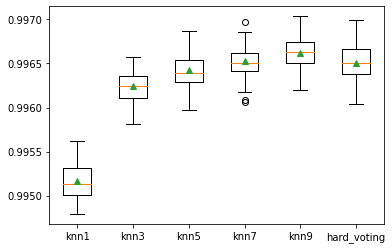

In [34]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_val, y_val)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [36]:
best_model = models['knn7']

In [37]:

knn_y_val = best_model.predict(X_val)
knn_y_val_acc = metrics.accuracy_score(y_val, knn_y_val)
print(f"Validation Accuracy of {k} Nearest Neighbour classifier = {knn_y_val_acc}")
cm = show_confusion_matrix(y_test = y_val, y_pred = knn_y_val, score = knn_y_val_acc)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
print(get_miou(cm))